In [1]:
import vaex

In [2]:
df_vaex = vaex.open("../data/trips/trips.hdf5")

Just a cheat sheet:

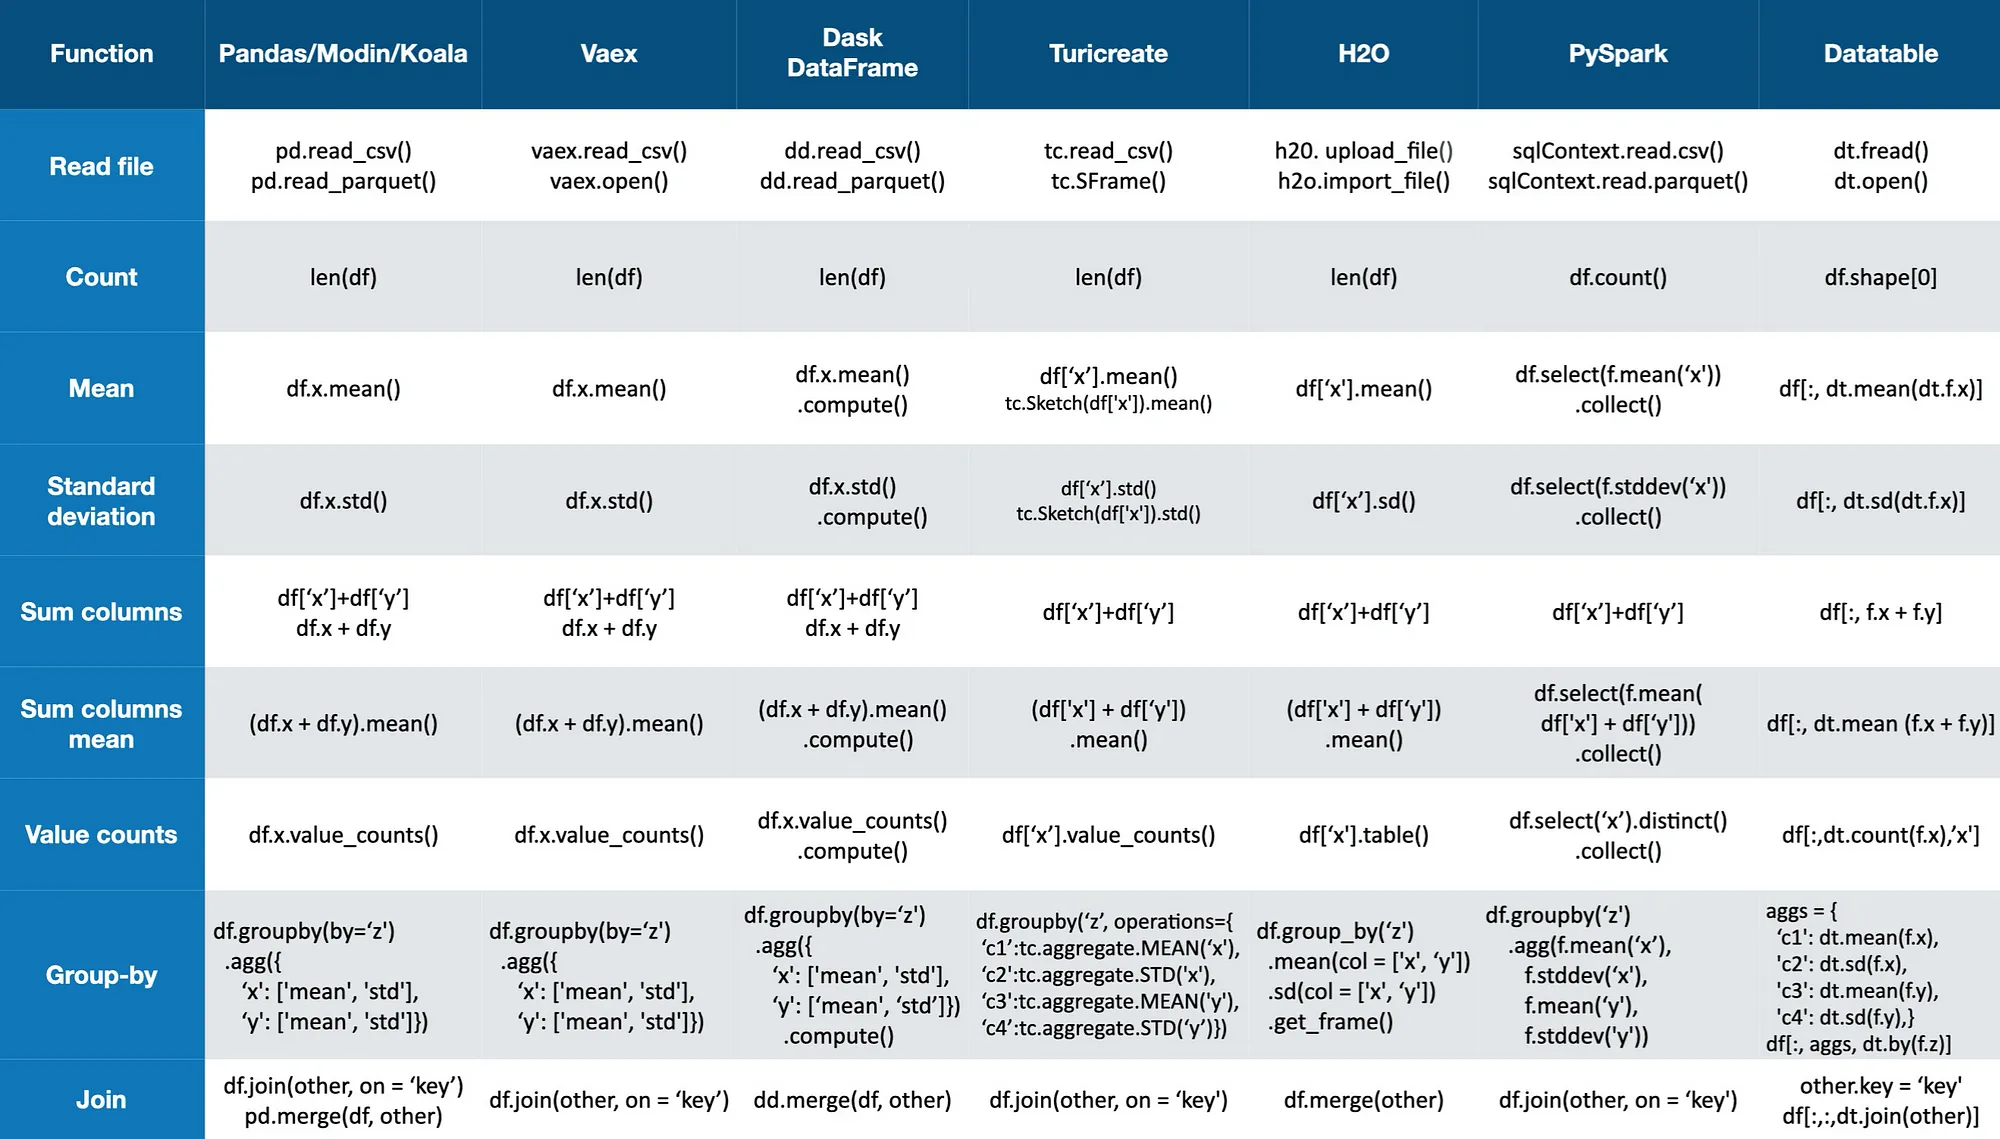

In [3]:
df_vaex.info()

column,type,unit,description,expression
Trip ID,str,,,
Taxi ID,str,,,
Trip Start Timestamp,str,,,
Trip End Timestamp,str,,,
Trip Seconds,float64,,,
Trip Miles,float64,,,
Pickup Census Tract,float64,,,
Dropoff Census Tract,float64,,,
Pickup Community Area,float64,,,
Dropoff Community Area,float64,,,


In [4]:
df_vaex.describe()

,Trip ID,Taxi ID,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,...,Extras,Trip Total,Payment Type,Company,Pickup Centroid Latitude,Pickup Centroid Longitude,Pickup Centroid Location,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Dropoff Centroid Location
data_type,string,large_string,string,string,float64,float64,float64,float64,float64,float64,...,float64,float64,string,string,float64,float64,string,float64,float64,string
count,37395436,37395079,37395436,37389567,37243185,37395384,25050728,24886904,32799394,32130074,...,37395208,37395208,37395436,31844863,32801555,32801555,32801555,32200561,32200561,32200561
NA,0,357,0,5869,152251,52,12344708,12508532,4596042,5265362,...,228,228,0,5550573,4593881,4593881,4593881,5194875,5194875,5194875
mean,--,--,--,--,738.3478666231151,2.813339689726614,17031344427.13744,17031341742.67466,21.595463349109437,21.015601520245486,...,0.8310885803870879,14.145692225326634,--,--,41.9036483117323,-87.6569268480757,--,41.903653398895884,-87.65566149905378,--
std,--,--,--,--,1180.184607,5.382278,335410.561074,331568.675963,18.904575,17.88967,...,22.978515,46.635981,--,--,0.037528,0.064712,--,0.038822,0.058391,--
min,--,--,--,--,0.0,0.0,17031010100.0,17031010100.0,1.0,1.0,...,0.0,0.0,--,--,41.660136,-87.913625,--,41.660136,-87.913625,--
max,--,--,--,--,86340.0,1530.4,17031990000.0,17031990000.0,77.0,77.0,...,9989.05,9999.82,--,--,42.021224,-87.534903,--,42.021224,-87.534903,--


In [5]:
import numpy as np
from datetime import datetime

def convert_to_datetime(date_string):
    return np.datetime64(datetime.strptime(str(date_string), "%m/%d/%Y %I:%M:%S %p"))

df_vaex['ts_start']  = df_vaex["Trip Start Timestamp"].apply(convert_to_datetime)

In [6]:
df_vaex['ts_start']

Expression = ts_start
Length: 37,395,436 dtype: datetime64[us] (column)
-------------------------------------------------
       0  2014-05-17 10:45:00.000000
       1  2014-04-17 18:30:00.000000
       2  2014-05-03 23:30:00.000000
       3  2014-05-17 01:30:00.000000
       4  2014-04-25 14:30:00.000000
                ...                 
37395431  2014-04-03 20:30:00.000000
37395432  2014-05-13 23:30:00.000000
37395433  2014-05-14 12:45:00.000000
37395434  2014-05-14 12:15:00.000000
37395435  2014-05-13 23:30:00.000000

In [7]:
df_vaex.start_ts = df_vaex.Extras
df_vaex.drop(df_vaex.start_ts, inplace=True)

#,Trip ID,Taxi ID,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,Fare,Tips,Tolls,Trip Total,Payment Type,Company,Pickup Centroid Latitude,Pickup Centroid Longitude,Pickup Centroid Location,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Dropoff Centroid Location,ts_start
0,506646dd0685bd55094f1b7dfac97cf3b07b6126,'1099c684f9da1ac1d0dd253d394f1c8dad37bc1a53d944d...,05/17/2014 10:45:00 AM,05/17/2014 11:00:00 AM,1080.0,7.0,17031281900.0,17031061100.0,28.0,6.0,17.45,0.0,0.0,18.95,Cash,Taxi Affiliation Services,41.879255084,-87.642648998,POINT (-87.642648998 41.8792550844),41.949139771,-87.656803909,POINT (-87.6568039088 41.9491397709),2014-05-17 10:45:00.000000
1,1462669f59c3b5a1730e8a5f511a4102d1998c21,'379e0fd9da136cabc9eec3aca37047bbdee373ca2ef7a03...,04/17/2014 06:30:00 PM,04/17/2014 07:00:00 PM,1080.0,3.0,nan,17031841100.0,nan,34.0,11.45,0.0,0.0,12.45,Cash,Taxi Affiliation Services,nan,nan,--,41.851017824,-87.635091856,POINT (-87.6350918563 41.8510178239),2014-04-17 18:30:00.000000
2,8d699aec32ce70e3647f7b06147001d3926975cc,'6768c7ebfdee8e7e7b3f5ec44739316241895aa2f7edf10...,05/03/2014 11:30:00 PM,05/03/2014 11:45:00 PM,720.0,2.1,17031081800.0,17031081403.0,8.0,8.0,8.45,2.0,0.0,11.45,Credit Card,Dispatch Taxi Affiliation,41.89321636,-87.63784421,POINT (-87.6378442095 41.8932163595),41.890922026,-87.618868355,POINT (-87.6188683546 41.8909220259),2014-05-03 23:30:00.000000
3,ae05f6f7a766b58b059f04c7549892da4dc3cf54,'7dc01f4be54a4058ffb81098be25f52c9f1249afc88e3ef...,05/17/2014 01:30:00 AM,05/17/2014 01:45:00 AM,480.0,0.0,17031071500.0,17031062200.0,7.0,6.0,7.85,3.0,0.0,11.85,Credit Card,Taxi Affiliation Services,41.914616286,-87.631717366,POINT (-87.6317173661 41.9146162864),41.94258518,-87.656644092,POINT (-87.6566440918 41.9425851797),2014-05-17 01:30:00.000000
4,b45b42620c3a926ea633b9115dc624a33dcf3b56,'9f87b11be025b5dcc55e9472b8c2158664c97d193cf15d9...,04/25/2014 02:30:00 PM,04/25/2014 02:30:00 PM,0.0,0.0,nan,nan,nan,nan,42.05,7.0,0.0,49.05,Credit Card,T.A.S. - Payment Only,nan,nan,--,nan,nan,--,2014-04-25 14:30:00.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"37,395,431",40aa131f22b63a5ca71d1eff4477500e6b875036,'8c244243c4123f4b467c2931cf59a691059a45302dc13e3...,04/03/2014 08:30:00 PM,04/03/2014 08:45:00 PM,900.0,3.7,nan,nan,6.0,24.0,11.25,0.0,0.0,11.25,Cash,Taxi Affiliation Services,41.944226601,-87.655998182,POINT (-87.6559981815 41.9442266014),41.901206994,-87.676355989,POINT (-87.6763559892 41.90120699410001),2014-04-03 20:30:00.000000
"37,395,432",0cd3c0015580380a89b2da5d4ed01016c0399e6a,'01480513a7f6f4664d6cc4c41ff3043ae6ecbc8cb17404f...,05/13/2014 11:30:00 PM,05/13/2014 11:45:00 PM,540.0,0.0,nan,nan,8.0,6.0,11.85,3.55,0.0,15.4,Credit Card,Blue Ribbon Taxi Association Inc.,41.899602111,-87.633308037,POINT (-87.6333080367 41.899602111),41.944226601,-87.655998182,POINT (-87.6559981815 41.9442266014),2014-05-13 23:30:00.000000
"37,395,433",d378e1b76a0de5844b9d50a719239bcf878da1fc,'fdeaab06ce15ad69658acbc0e591218ef6146a29ef21275...,05/14/2014 12:45:00 PM,05/14/2014 12:45:00 PM,240.0,0.0,17031839100.0,17031833000.0,32.0,28.0,5.25,3.0,0.0,9.75,Credit Card,Taxi Affiliation Services,41.880994471,-87.632746489,POINT (-87.6327464887 41.8809944707),41.88528132,-87.6572332,POINT (-87.6572331997 41.8852813201),2014-05-14 12:45:00.000000
"37,395,434",d64938a724961d6f2c0ae58932e78e3671784822,'a42edac48945c9dab13540adee09290f11b123a513580f2...,05/14/2014 12:15:00 PM,05/14/2014 12:15:00 PM,360.0,0.0,17031081202.0,17031081300.0,8.0,8.0,5.05,0.0,0.0,5.05,Cash,KOAM Taxi Association,41.902788048,-87.62614559,POINT (-87.6261455896 41.9027880476),41.898331794,-87.620762865,POINT (-87.6207628651 41.8983317935),2014-05-14 12:15:00.000000


In [8]:
df_vaex.head()

#,Trip ID,Taxi ID,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,Fare,Tips,Tolls,Trip Total,Payment Type,Company,Pickup Centroid Latitude,Pickup Centroid Longitude,Pickup Centroid Location,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Dropoff Centroid Location,ts_start
0,506646dd0685bd55094f1b7dfac97cf3b07b6126,'1099c684f9da1ac1d0dd253d394f1c8dad37bc1a53d944d...,05/17/2014 10:45:00 AM,05/17/2014 11:00:00 AM,1080,7,1.70313e+10,1.70311e+10,28,6,17.45,0,0,18.95,Cash,Taxi Affiliation Services,41.8793,-87.6426,POINT (-87.642648998 41.8792550844),41.9491,-87.6568,POINT (-87.6568039088 41.9491397709),2014-05-17 10:45:00.000000
1,1462669f59c3b5a1730e8a5f511a4102d1998c21,'379e0fd9da136cabc9eec3aca37047bbdee373ca2ef7a03...,04/17/2014 06:30:00 PM,04/17/2014 07:00:00 PM,1080,3,nan,1.70318e+10,nan,34,11.45,0,0,12.45,Cash,Taxi Affiliation Services,nan,nan,--,41.851,-87.6351,POINT (-87.6350918563 41.8510178239),2014-04-17 18:30:00.000000
2,8d699aec32ce70e3647f7b06147001d3926975cc,'6768c7ebfdee8e7e7b3f5ec44739316241895aa2f7edf10...,05/03/2014 11:30:00 PM,05/03/2014 11:45:00 PM,720,2.1,1.70311e+10,1.70311e+10,8,8,8.45,2,0,11.45,Credit Card,Dispatch Taxi Affiliation,41.8932,-87.6378,POINT (-87.6378442095 41.8932163595),41.8909,-87.6189,POINT (-87.6188683546 41.8909220259),2014-05-03 23:30:00.000000
3,ae05f6f7a766b58b059f04c7549892da4dc3cf54,'7dc01f4be54a4058ffb81098be25f52c9f1249afc88e3ef...,05/17/2014 01:30:00 AM,05/17/2014 01:45:00 AM,480,0,1.70311e+10,1.70311e+10,7,6,7.85,3,0,11.85,Credit Card,Taxi Affiliation Services,41.9146,-87.6317,POINT (-87.6317173661 41.9146162864),41.9426,-87.6566,POINT (-87.6566440918 41.9425851797),2014-05-17 01:30:00.000000
4,b45b42620c3a926ea633b9115dc624a33dcf3b56,'9f87b11be025b5dcc55e9472b8c2158664c97d193cf15d9...,04/25/2014 02:30:00 PM,04/25/2014 02:30:00 PM,0,0,nan,nan,nan,nan,42.05,7,0,49.05,Credit Card,T.A.S. - Payment Only,nan,nan,--,nan,nan,--,2014-04-25 14:30:00.000000
5,453ea70fcf532709b7c5c375524c67aa90d3f6e8,'c07b66852d62e4ca90da2465180f752cf58f1881227d5a4...,05/14/2014 09:15:00 AM,05/14/2014 09:30:00 AM,180,1,nan,nan,1,77,5.05,0,0,5.05,Cash,Choice Taxi Association,42.0096,-87.6702,POINT (-87.67016685690001 42.0096228806),41.9867,-87.6634,POINT (-87.6634164054 41.9867117999),2014-05-14 09:15:00.000000
6,3dea99dbe791d85be040b2a29a61c01ecbc9e398,'c7ddf37c666f7d7a9d0c3acb6399c2432c6e3352ed9a85c...,05/04/2014 03:15:00 AM,05/04/2014 03:30:00 AM,840,2.5,1.70311e+10,1.70318e+10,8,32,9.85,0,0,9.85,Cash,Dispatch Taxi Affiliation,41.9075,-87.6358,POINT (-87.6357600901 41.9074919303),41.871,-87.6314,POINT (-87.6314065252 41.8710158803),2014-05-04 03:15:00.000000
7,e7bcf0bea8db910d093a35a3f9c3f084ac159f37,'24fc79f7f165c3c1400c126e8821aa6bf623216a0066bec...,05/11/2014 06:00:00 PM,05/11/2014 06:00:00 PM,240,0,1.70311e+10,1.70311e+10,8,8,5.25,0,0,5.25,Cash,Blue Ribbon Taxi Association Inc.,41.8992,-87.6262,POINT (-87.6262105324 41.8991556134),41.9095,-87.631,POINT (-87.630963601 41.9094956686),2014-05-11 18:00:00.000000
8,57a154e167936798a65a7297984327672e28a278,'e4d0e3e6e52230c3d66823a27dbadf419f08bbe37af6423...,05/11/2014 04:00:00 PM,05/11/2014 04:15:00 PM,660,4.1,1.70311e+10,1.70311e+10,8,6,11.25,2.45,0,14.7,Credit Card,Dispatch Taxi Affiliation,41.892,-87.6319,POINT (-87.6318639497 41.8920421365),41.9384,-87.6386,POINT (-87.6385749205 41.938391257700005),2014-05-11 16:00:00.000000
9,0b9747970e0ca0321546d42e2c7a1be5c08e4c28,'73a104e24db7aca97527954d5df152e176df79764d24b1a...,05/11/2014 04:00:00 PM,05/11/2014 04:30:00 PM,960,0,1.70313e+10,1.70311e+10,28,8,10.25,0,0,11.75,Cash,Blue Ribbon Taxi Association Inc.,41.8793,-87.6426,POINT (-87.642648998 41.8792550844),41.8992,-87.6262,POINT (-87.6262105324 41.8991556134),2014-05-11 16:00:00.000000


In [9]:
#df_vaex.groupby(by=["ts_start"]).count()

In [10]:
#df_vaex.ts_start.value_counts()

In [11]:
df_vaex["Trip Seconds"].mean()

array(738.34786662)

In [12]:
df_vaex.close()

[05/12/23 18:52:48] WARNING  could not close memmap for column ../data/trips/trips.hdf5          ]8;id=249328;file://c:\Users\leoni\.virtualenvs\AAA_2023-Ne9h4ijP\lib\site-packages\vaex\dataset_mmap.py\dataset_mmap.py]8;;\:]8;id=544033;file://c:\Users\leoni\.virtualenvs\AAA_2023-Ne9h4ijP\lib\site-packages\vaex\dataset_mmap.py#94\94]8;;\